In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
p_pheno = '/home/harveyaa/Documents/fMRI/data/ukbb_9cohorts/pheno_26-01-22.csv'
p_conn = '/home/harveyaa/Documents/fMRI/data/ukbb_9cohorts/connectomes_01-12-21.csv'

pheno = pd.read_csv(p_pheno,index_col=0)
conn = pd.read_csv(p_conn,index_col=0)

/home/harveyaa/miniconda3/envs/MTL/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7,8,12,13,14,19,20,24,27,31,42,43,44,49,51,59,60,62,64,65,68,101,121,163) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
cases = ['SZ',
        'ASD',
        'BIP',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'DEL1q21_1',
        'DUP1q21_1']

conf = ['AGE',
        'SEX',
        'SITE',
        'mean_conn',
        'FD_scrubbed']

In [33]:
p_ids = '/home/harveyaa/Documents/masters/MTL/conf_balancing/dataset_ids'

clfs = {'SVC_1':SVC(C=1,class_weight='balanced'),
        'SVC_10':SVC(C=10,class_weight='balanced'),
        'SVC_100':SVC(C=100,class_weight='balanced'),
        'LR':LogisticRegression(class_weight='balanced'),
        'kNN_5':KNeighborsClassifier()}

mean_acc_conf = {}
mean_acc_conn = {}
for clf in clfs:
        mean_acc_conf[clf] = []
        mean_acc_conn[clf] = []

for case in cases:
    print(case)
    # Load ids
    dataset_ids = pd.read_csv(os.path.join(p_ids,f"{case}.csv"),index_col=0)

    # Confound matrix
    df = pheno[pheno.index.isin(dataset_ids.index)]
    X = pd.get_dummies(df[conf],columns=['SEX','SITE'],drop_first=True)

    # Connectomes
    X_conn = conn[conn.index.isin(dataset_ids.index)]

    # Labels
    y = dataset_ids[case]

    acc_conf = {}
    acc_conn = {}
    for clf in clfs:
        acc_conf[clf] = []
        acc_conn[clf] = []
        
    for i in range(5):
        for clf in clfs:
            if f'fold_{i}' in dataset_ids.columns:
                # Test set ids for fold
                test_mask = (dataset_ids[f'fold_{i}'] == 1).to_numpy()

                # Train/test split
                X_train, X_test = X[~test_mask], X[test_mask]
                X_conn_train, X_conn_test = X_conn[~test_mask], X_conn[test_mask]
                y_train, y_test = y[~test_mask], y[test_mask]

                # Pred from confounds
                clfs[clf].fit(X_train,y_train)
                pred = clfs[clf].predict(X_test)
                acc_conf[clf].append(accuracy_score(y_test,pred))

                # Pred from connectomes
                clfs[clf].fit(X_conn_train,y_train)
                pred_conn = clfs[clf].predict(X_conn_test)
                acc_conn[clf].append(accuracy_score(y_test,pred_conn))
    for clf in clfs:
        mean_acc_conf[clf].append(np.mean(acc_conf[clf]))
        mean_acc_conn[clf].append(np.mean(acc_conn[clf]))

SZ


/home/harveyaa/miniconda3/envs/MTL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/harveyaa/miniconda3/envs/MTL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

ASD


/home/harveyaa/miniconda3/envs/MTL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/harveyaa/miniconda3/envs/MTL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

BIP


/home/harveyaa/miniconda3/envs/MTL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/harveyaa/miniconda3/envs/MTL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

DEL22q11_2
DUP22q11_2
DEL16p11_2
DUP16p11_2
DEL1q21_1
DUP1q21_1


In [34]:
results = {}
for clf in clfs:
    results[clf] = pd.DataFrame([mean_acc_conf[clf],mean_acc_conn[clf]],columns=cases,index=['conf','conn']).transpose()

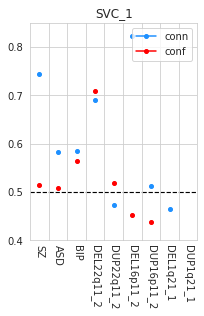

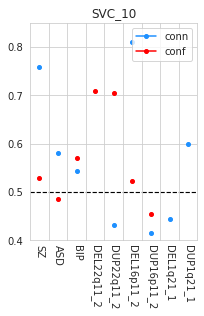

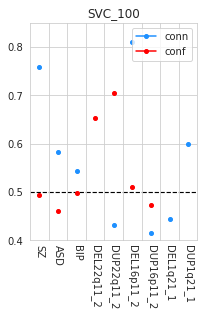

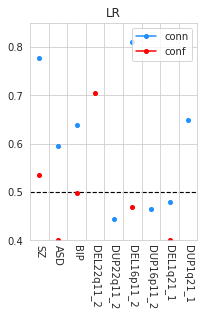

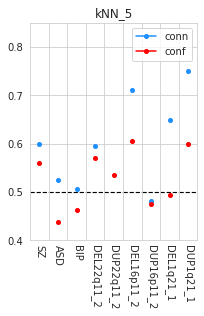

In [35]:
for clf in clfs:
    fig,ax = plt.subplots(1,len(cases),figsize=(3,4),sharey=True,sharex=True)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.ylim(0,1)
    sns.set_style('whitegrid')

    for j,case in enumerate(cases):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        ax[j].plot(0,conn_acc,marker='o',color='dodgerblue',ms=4,markerfacecolor='dodgerblue',label='conn')
        ax[j].plot(0,conf_acc,marker='o',color='red',ms=4,markerfacecolor='red',label='conf')

        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.1,0.1)
        ax[j].set_ylim(0.4,0.85)

        ax[j].set_xlabel(case,rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')
        fig.subplots_adjust(wspace=0)

    ax[4].set_title(clf)
    plt.legend()
#plt.tight_layout()
#plt.savefig('/home/harveyaa/Documents/masters/MTL/results/courtois_meeting/tasks_9/run1.png',dpi=300)

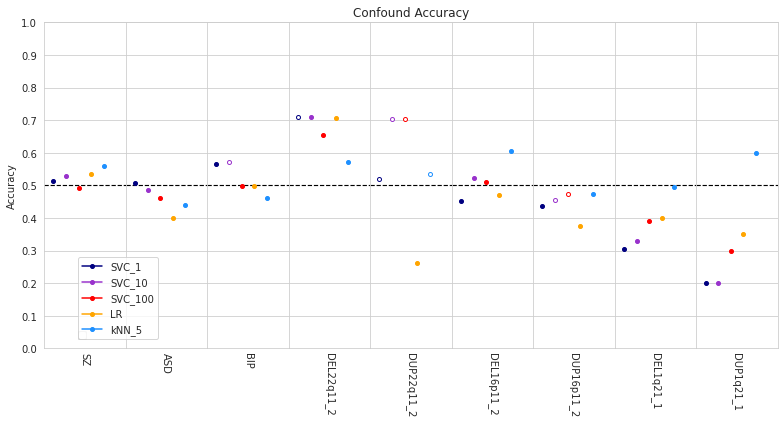

In [43]:
title = 'Confound Accuracy'
xlabels=None

fig,ax = plt.subplots(1,len(cases),figsize=(int(len(cases)/2)+7,6),sharey=True,sharex=True)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.ylim(0,1)
sns.set_style('whitegrid')
#colors = ['blue','red','green','orange','red','purple']
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'
        #ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc,label=clf)
        #ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)

        if not xlabels is None:
            #ax[j].set_xlabel(xlabels[j],rotation=270) 
            ax[j].set_xlabel(xlabels[j],rotation=90) 
        else:
            ax[j].set_xlabel(case,rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

    handles, _ = ax[-1].get_legend_handles_labels()
    labels = clfs.keys()

    ax[0].set_ylabel('Accuracy')
    fig.legend(handles, labels, loc=(0.1,0.2))
    ax[int(len(cases)/2)].set_title(title)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0)
    #plt.savefig('conf_acc.png',dpi=300)